#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS AND NEURAL NETWORK TO PREDICT VALUE OF "CLASS" FEATURE FOR MULTI-CLASS CLASSIFICATION KAGGLE CASE

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import model_selection
from sklearn import svm
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest

from xgboost import XGBClassifier

import tensorflow as tf

import keras

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

#### LOADING DATA_TRAIN AND DATA_TEST

In [127]:
data_train = pd.read_csv("C:/Users/Uzytkownik/Desktop/Kaggle competitions/Multi-Class Classification/train.csv")
data_test = pd.read_csv("C:/Users/Uzytkownik/Desktop\Kaggle competitions/Multi-Class Classification/test.csv")

#### PRINTING DATA_TRAIN

In [128]:
data_train

,ID,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class
0,0,2,0,Medium,19,68,3,3,2,7,1.26166000108657,133.0,0
1,1,2,0,Medium,20,66,3,3,2,7,1.44296997784168,59.0,3
2,2,2,0,Medium,20,87,3,3,2,10,8.31096867770419,79.0,0
3,3,2,0,?,21,73,3,3,2,8,9.43591274696865,43.0,0
4,4,2,0,Medium,16,53,3,3,2,7,1.16976754958987,18.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,2,0,Small,20,66,2,2,4,15,3.41348635236664,100.0,2
367,367,3,1,Medium,30,109,4,4,2,7,0.13695463195127,58.0,0
368,368,2,0,Small,30,102,2,2,3,12,0.516789172751702,24.0,2
369,369,2,0,Medium,31,109,3,3,6,10,8.5851607112782,9.0,5


#### CHECKING FOR DUPLICATES IN DATA_TRAIN AND DATA_TEST

In [129]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### DEFINING FUNCTION TO CHECK FOR MISSING VALUES IN DATA

In [130]:
def Percentage_Missing_Values(df, missing_data_treshold):
    
    features_to_drop = []
            
    if df.isnull().sum().sum() != 0:
        
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
                      
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='vertical')
        sns.barplot(x=na_df.index, y=na_df)
        
        ax.bar_label(ax.containers[0], fontsize=10, labels= round(na_df, 2))
        
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
        for missing_index, missing_value in zip(missing_data['Missing Ratio %'].index, missing_data['Missing Ratio %'].values):
            if missing_value > missing_data_treshold:
                features_to_drop.append(missing_index)
                        
        return features_to_drop
        
    else:
        print('No NAs found')

#### CHECKING MISSING VALUES IN DATA_TRAIN

In [131]:
Percentage_Missing_Values(data_train, 10)

No NAs found


#### CHECKING MISSING VALUES IN DATA_TEST

In [132]:
Percentage_Missing_Values(data_test, 10)

No NAs found


#### PLOTTING DISTRIBUTION OF CLASS FEATURE

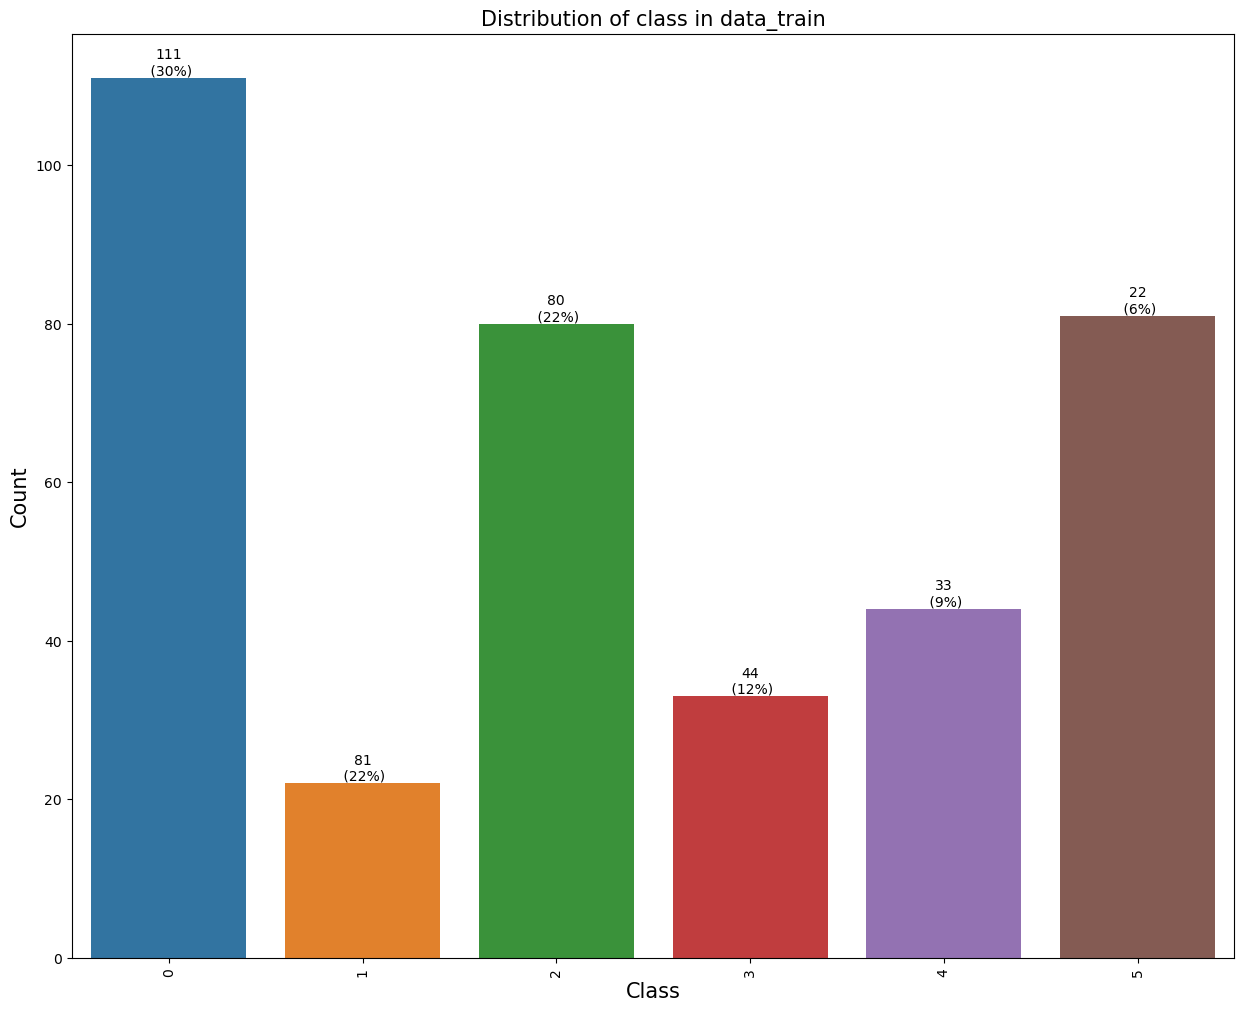

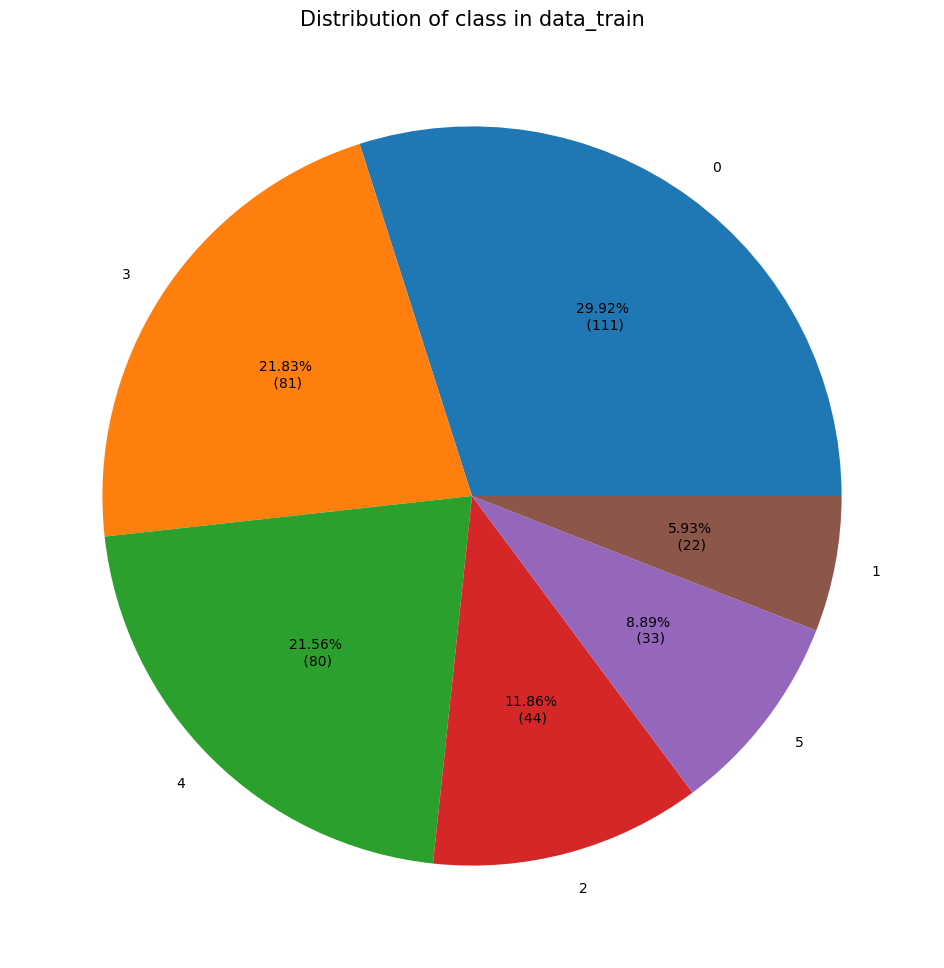

In [133]:
absolute_values = data_train['Class'].value_counts()
relative_values = data_train['Class'].value_counts(ascending=False, normalize=True).values * 100
bar_labels = [f'{values[0]}\n ({values[1]:.0f}%)' for values in zip(absolute_values, relative_values)]

plt.subplots(figsize=(15, 12))
ax = sns.barplot(x=data_train['Class'].value_counts().index, 
                 y=data_train['Class'].value_counts(), errorbar=None)
ax.bar_label(ax.containers[0], 
             fontsize=10, 
             labels=bar_labels)
plt.xticks(rotation='vertical')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of class in data_train', fontsize=15)
plt.show()


plt.subplots(figsize=(15, 12))
plt.pie(x=data_train['Class'].value_counts(), 
        labels=data_train['Class'].unique(), 
        autopct= lambda value: '{:.2f}%\n ({:.0f})'.format(value,(value/100)*absolute_values.sum()))
plt.title('Distribution of class in data_train', fontsize=15)
plt.show()

#### REPLACING '?' BY NP.NAN VARIABLE IN DATASET, REMOVING 'ID' FEATURE

In [134]:
dataset = [data_train,data_test]

for data in dataset:
    del data['ID']
    for column in data.columns:
        data[column].replace('?', np.nan, inplace= True)

#### PRINTING DATA_TRAIN INFO

In [135]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Number of Quantities                368 non-null    object 
 1   Number of Insignificant Quantities  368 non-null    object 
 2   Size                                369 non-null    object 
 3   Total Number of Words               370 non-null    object 
 4   Total Number of Characters          371 non-null    int64  
 5   Number of Special Characters        367 non-null    object 
 6   Number of Sentences                 371 non-null    int64  
 7   First Index                         371 non-null    int64  
 8   Second Index                        371 non-null    int64  
 9   Difficulty                          369 non-null    object 
 10  Score                               371 non-null    float64
 11  Class                               371 non-n

#### FILLING MISSING VALUES WITH MODE AND MEAN VALUES

In [136]:
for data in dataset:
    data['Number of Quantities'].replace(np.nan, data['Number of Quantities'].mode()[0], inplace= True)
    data['Number of Quantities'] = data['Number of Quantities'].astype(float)

    data['Number of Insignificant Quantities'].replace(np.nan, data['Number of Insignificant Quantities'].mode()[0], inplace= True)
    data['Number of Insignificant Quantities'] = data['Number of Insignificant Quantities'].astype(float)
    
    data['Size'].replace(np.nan, data_train['Size'].mode()[0], inplace= True)
    
    data['Total Number of Words'].replace(np.nan, data['Total Number of Words'].mode()[0], inplace= True)
    data['Total Number of Words'] = data['Total Number of Words'].astype(float)
    
    data['Total Number of Characters'].replace(np.nan, data['Total Number of Characters'].mode()[0], inplace= True)
    data['Total Number of Characters'] = data['Total Number of Characters'].astype(float)
    
    data['Number of Special Characters'].replace(np.nan, data['Number of Special Characters'].mode()[0], inplace= True)
    data['Number of Special Characters'] = data['Number of Special Characters'].astype(float)
    
    data['Difficulty'].replace(np.nan, data['Difficulty'].astype(float).mean(), inplace= True)
    data['Difficulty'] = data['Difficulty'].astype(float)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Number of Quantities                371 non-null    float64
 1   Number of Insignificant Quantities  371 non-null    float64
 2   Size                                371 non-null    object 
 3   Total Number of Words               371 non-null    float64
 4   Total Number of Characters          371 non-null    float64
 5   Number of Special Characters        371 non-null    float64
 6   Number of Sentences                 371 non-null    int64  
 7   First Index                         371 non-null    int64  
 8   Second Index                        371 non-null    int64  
 9   Difficulty                          371 non-null    float64
 10  Score                               371 non-null    float64
 11  Class                               371 non-n

#### PLOTTING HISTOGRAM OF 'NUMBER OF QUANTITIES' FEATURE

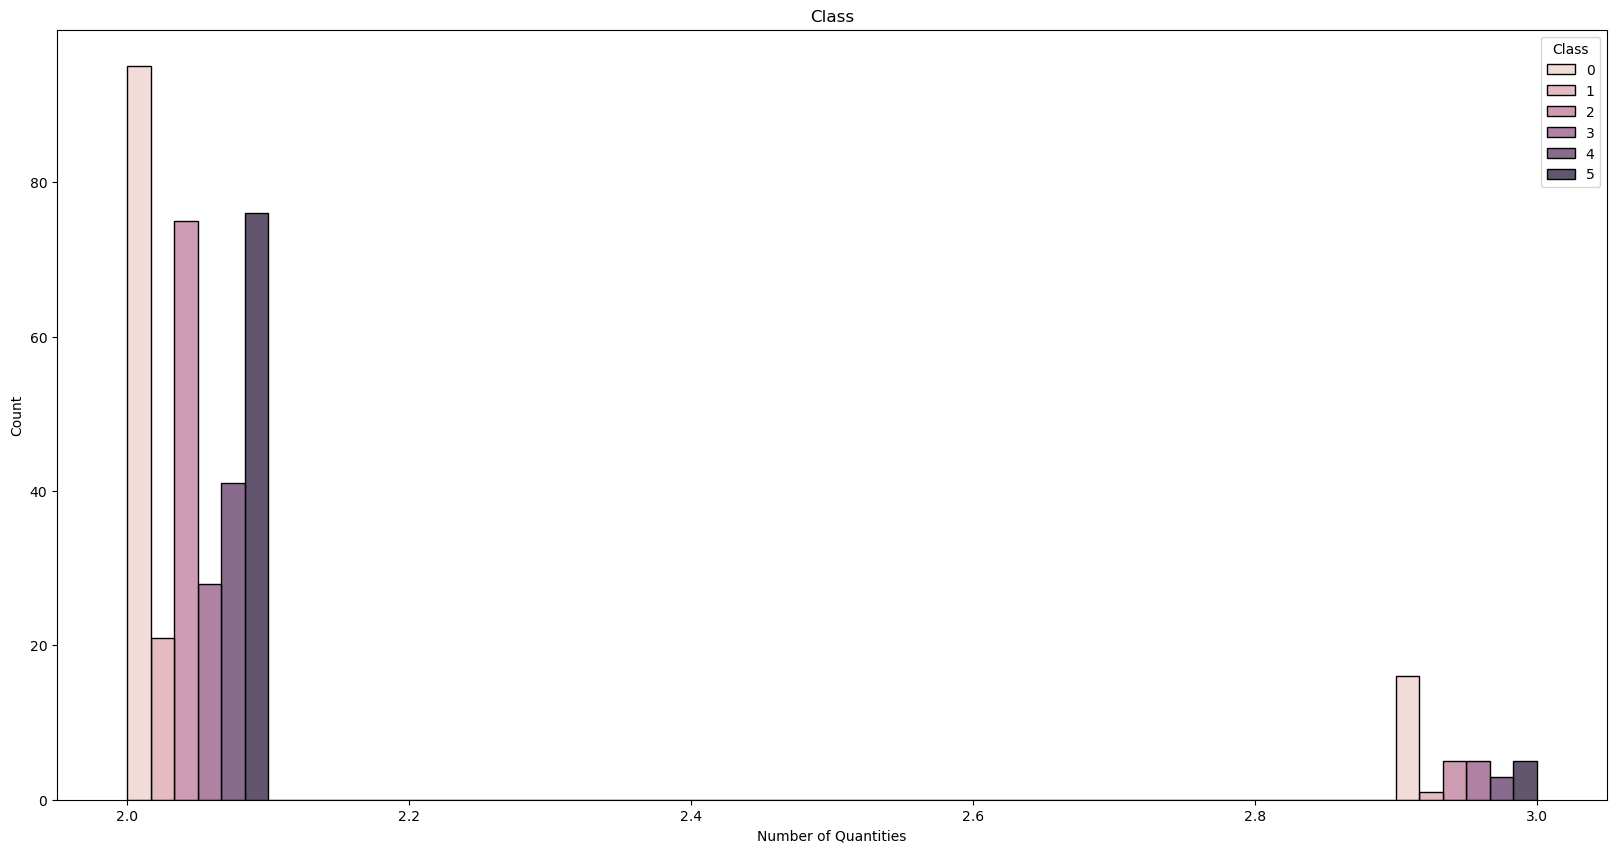

In [137]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Number of Quantities'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'NUMBER OF INSIGNIFICANT QUANTITIES' FEATURE

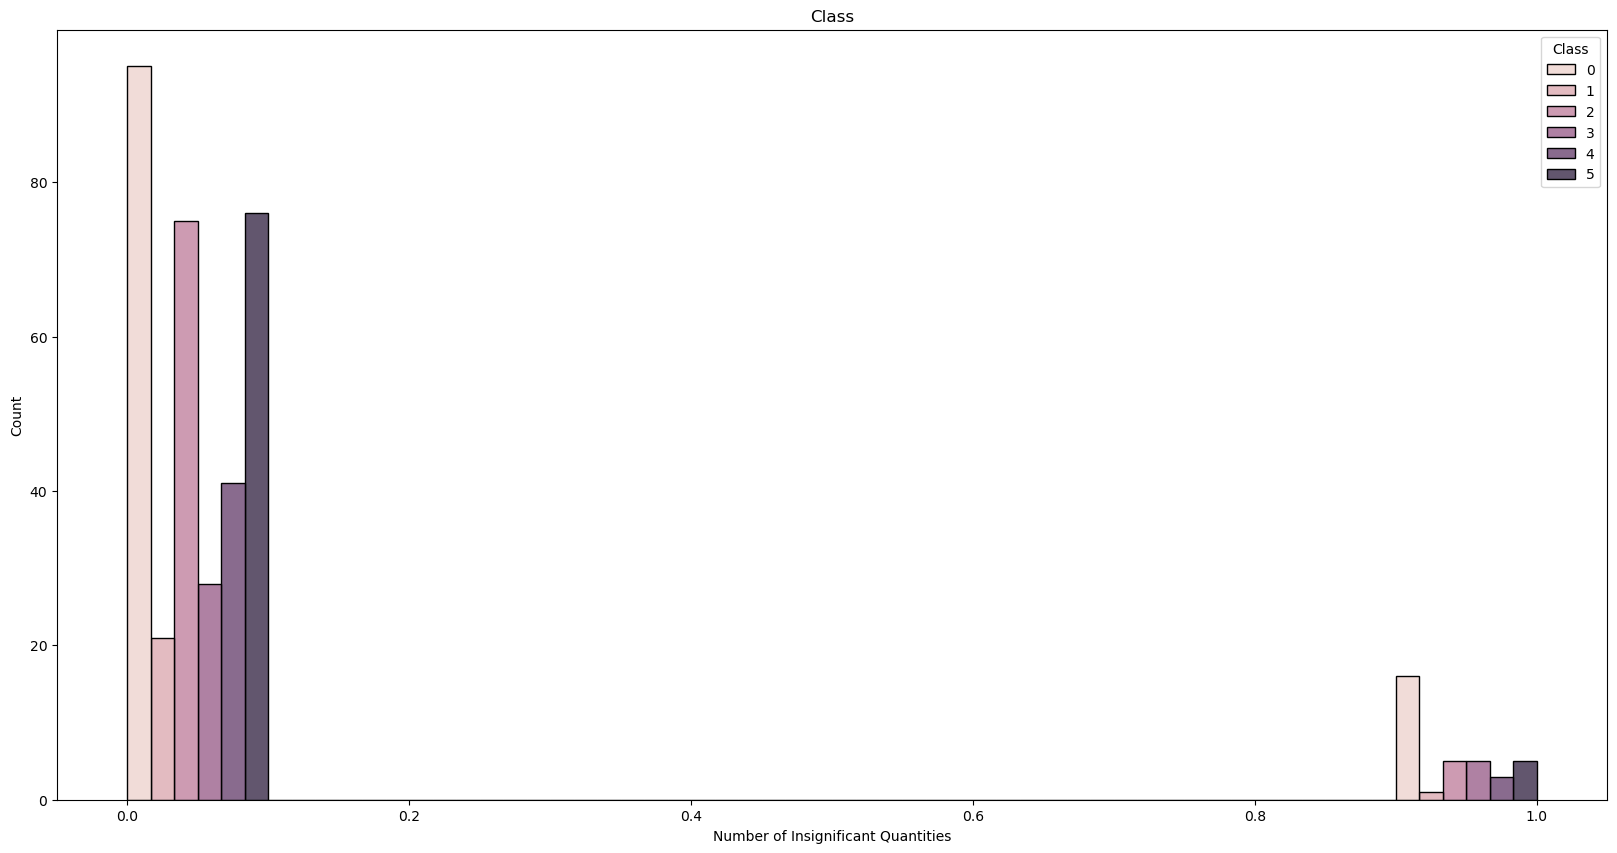

In [138]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Number of Insignificant Quantities'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'SIZE' FEATURE

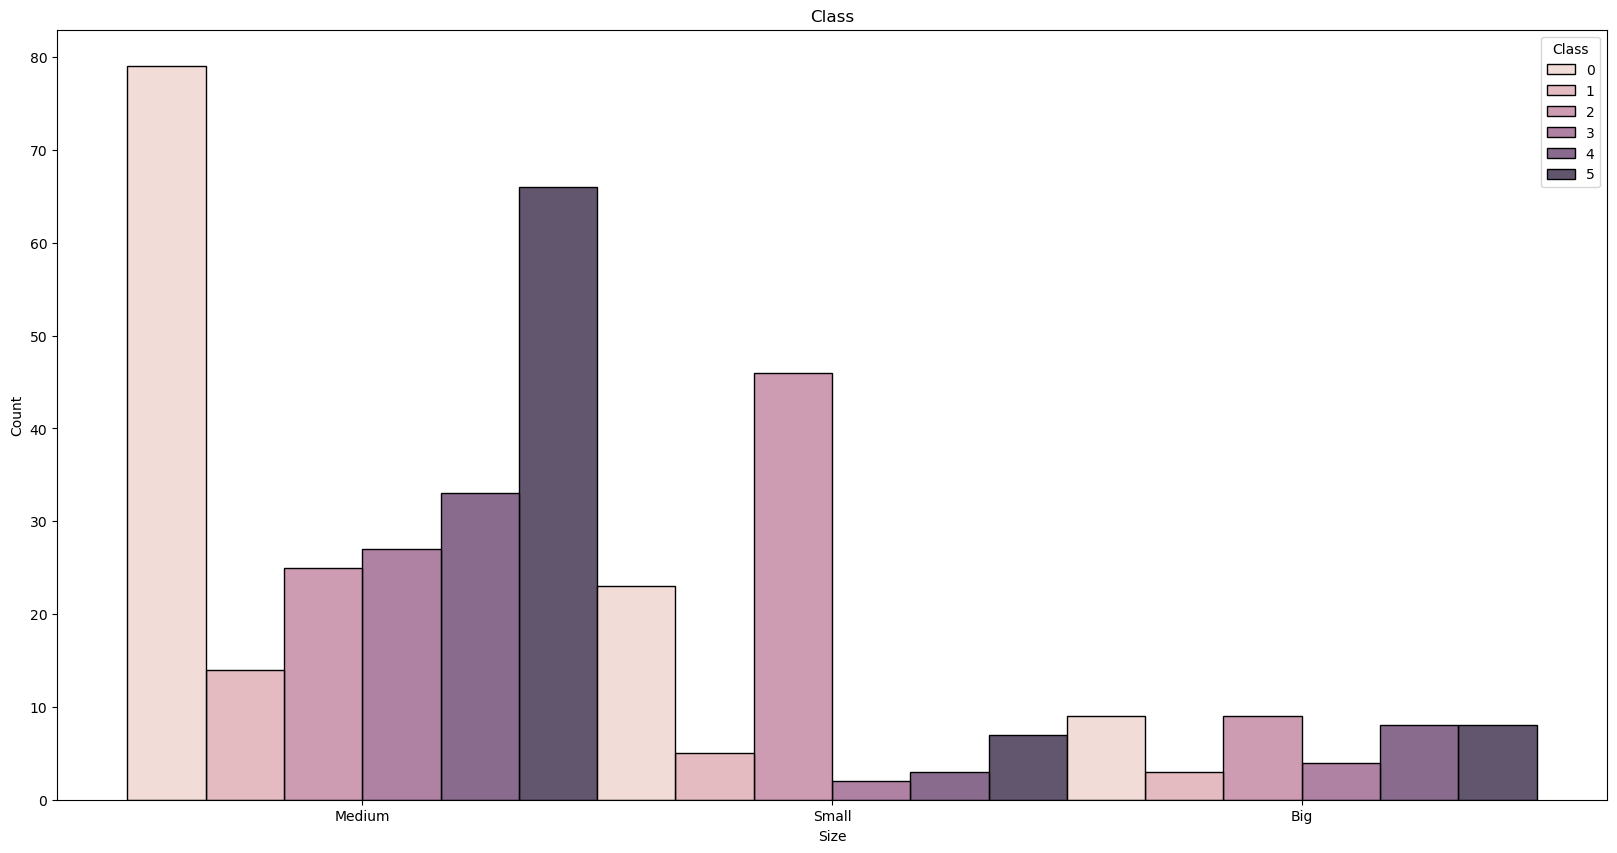

In [139]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Size'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'TOTAL NUMBER OF WORDS' FEATURE

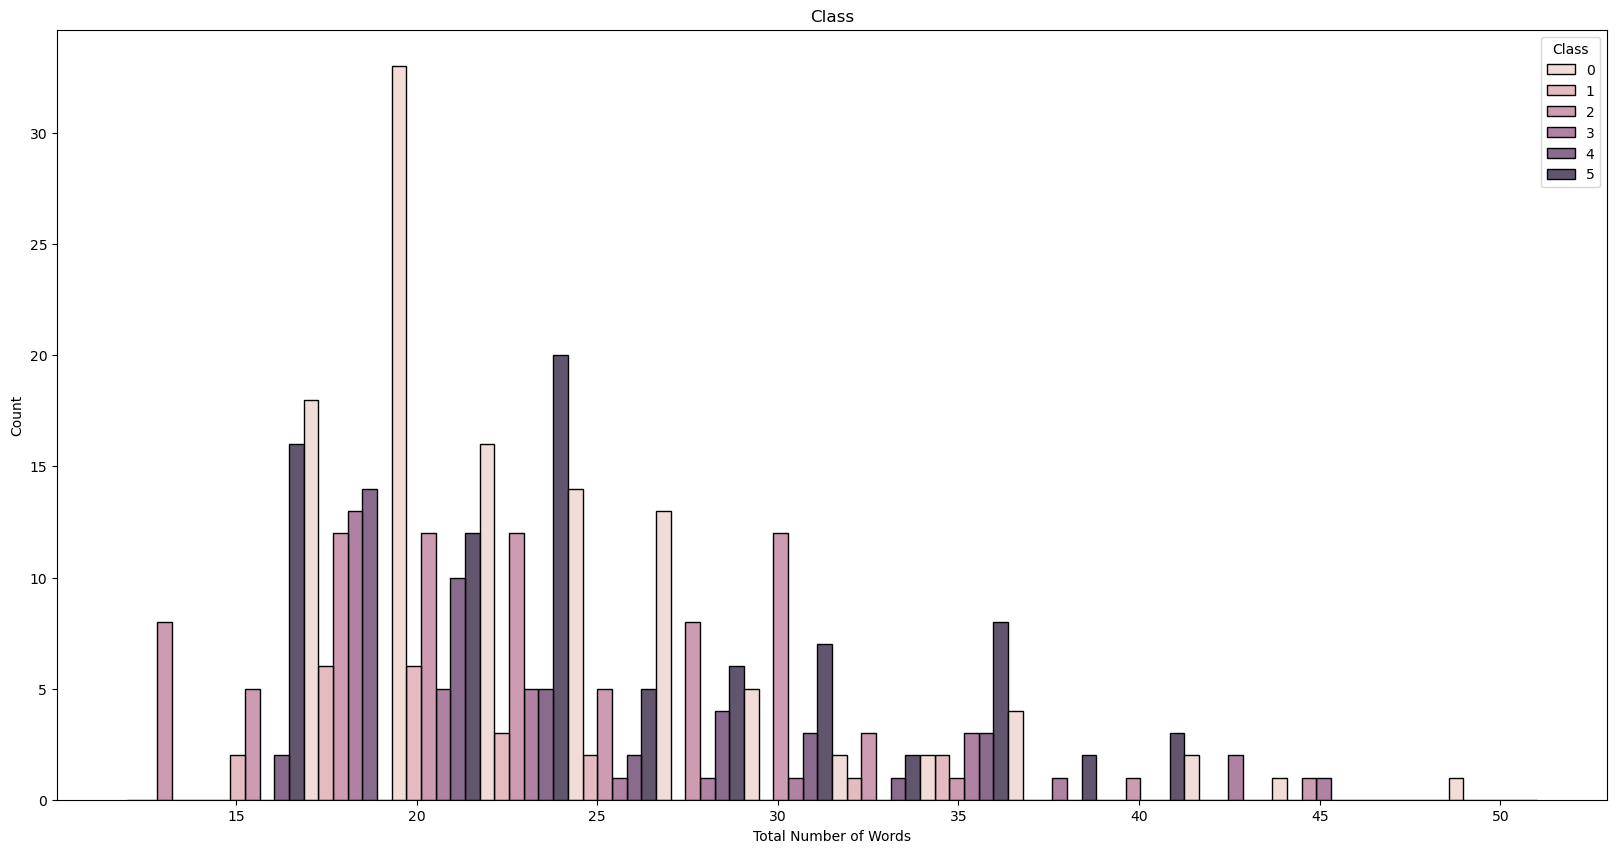

In [140]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Total Number of Words'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'TOTAL NUMBER OF CHARACTERS' FEATURE

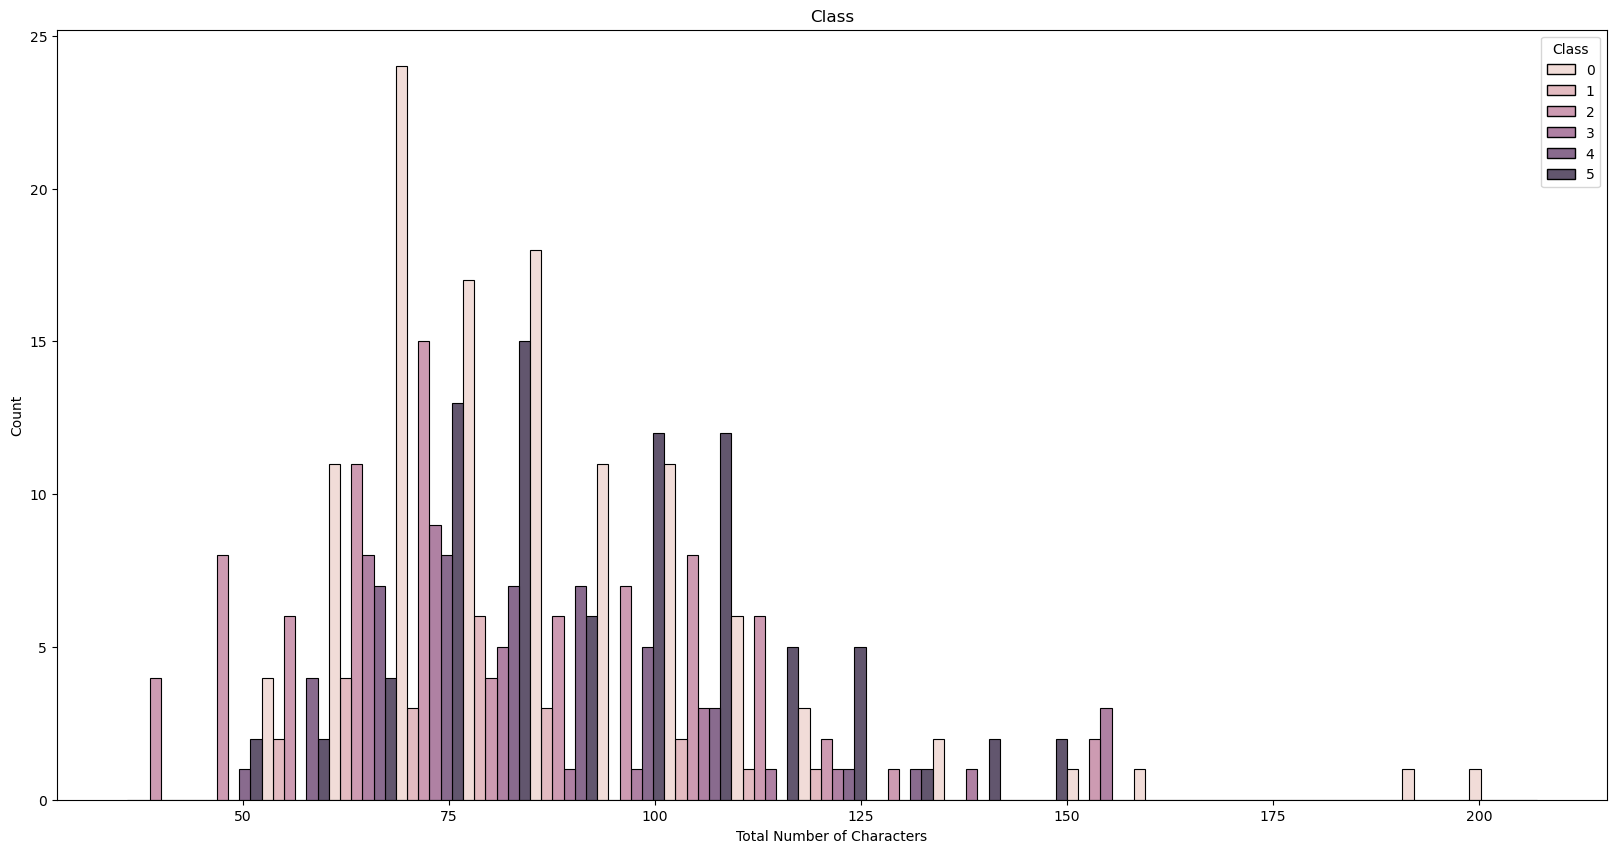

In [141]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Total Number of Characters'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'NUMBER OF SPECIAL CHARACTERS' FEATURE

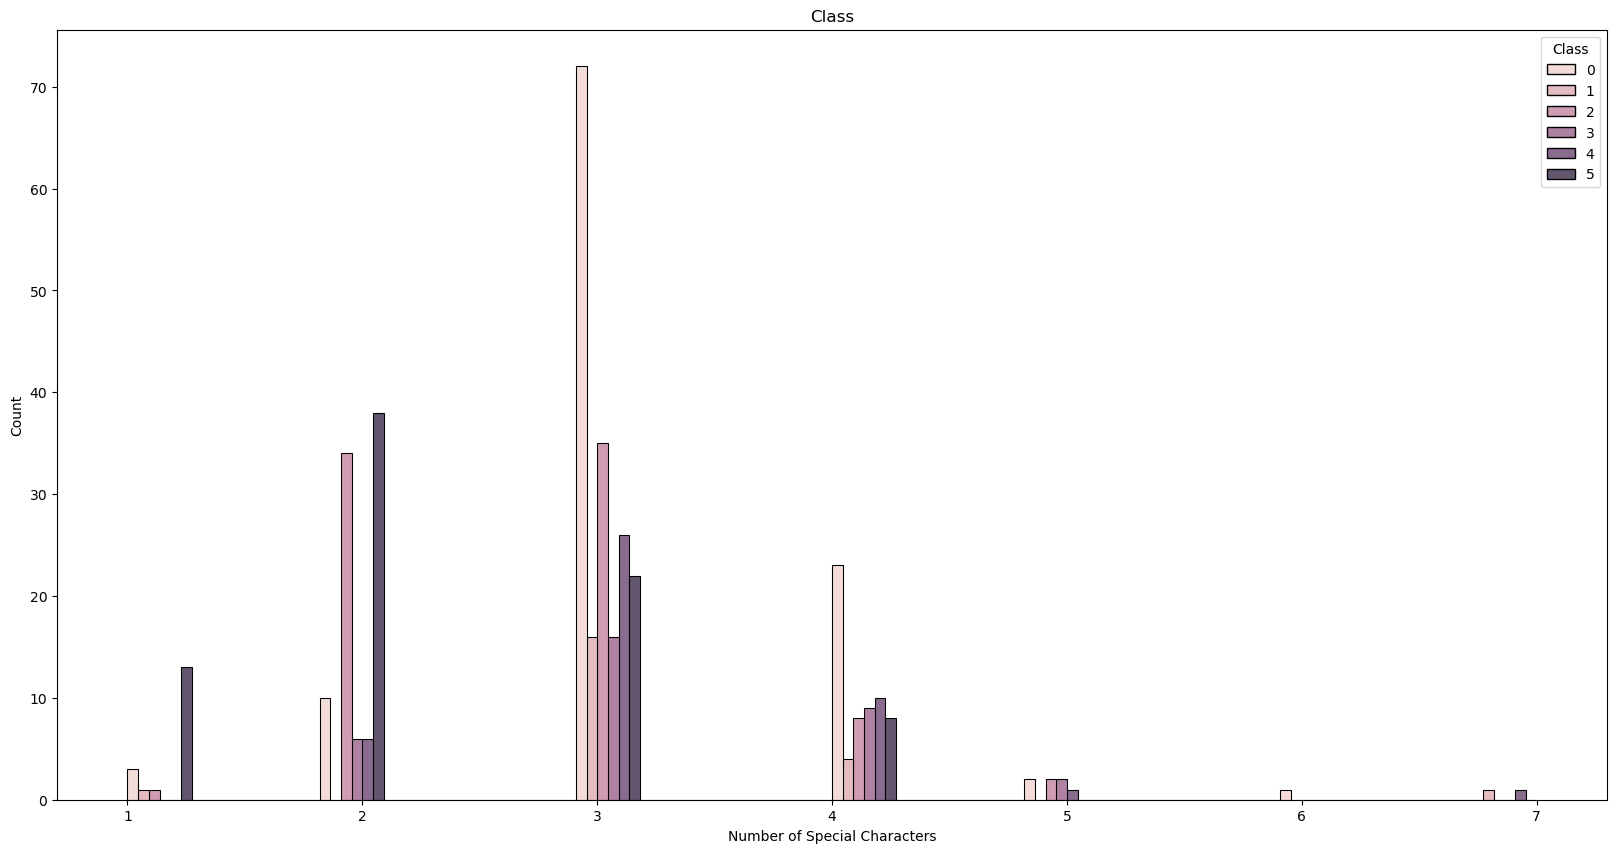

In [142]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Number of Special Characters'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'NUMBER OF SENTENCES' FEATURE

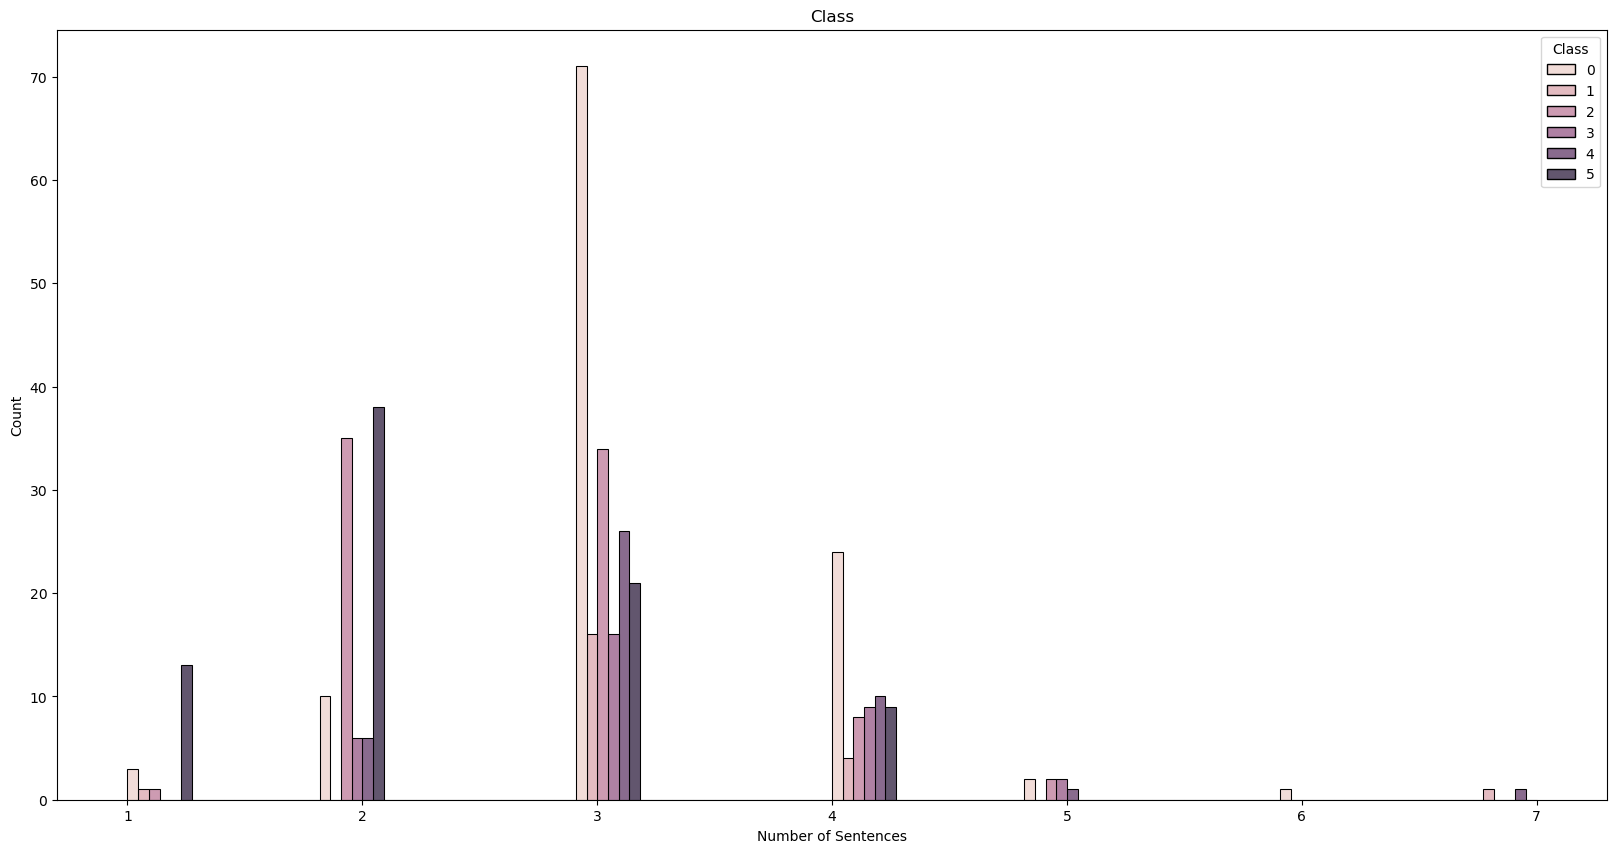

In [144]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Number of Sentences'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'FIRST INDEX' FEATURE

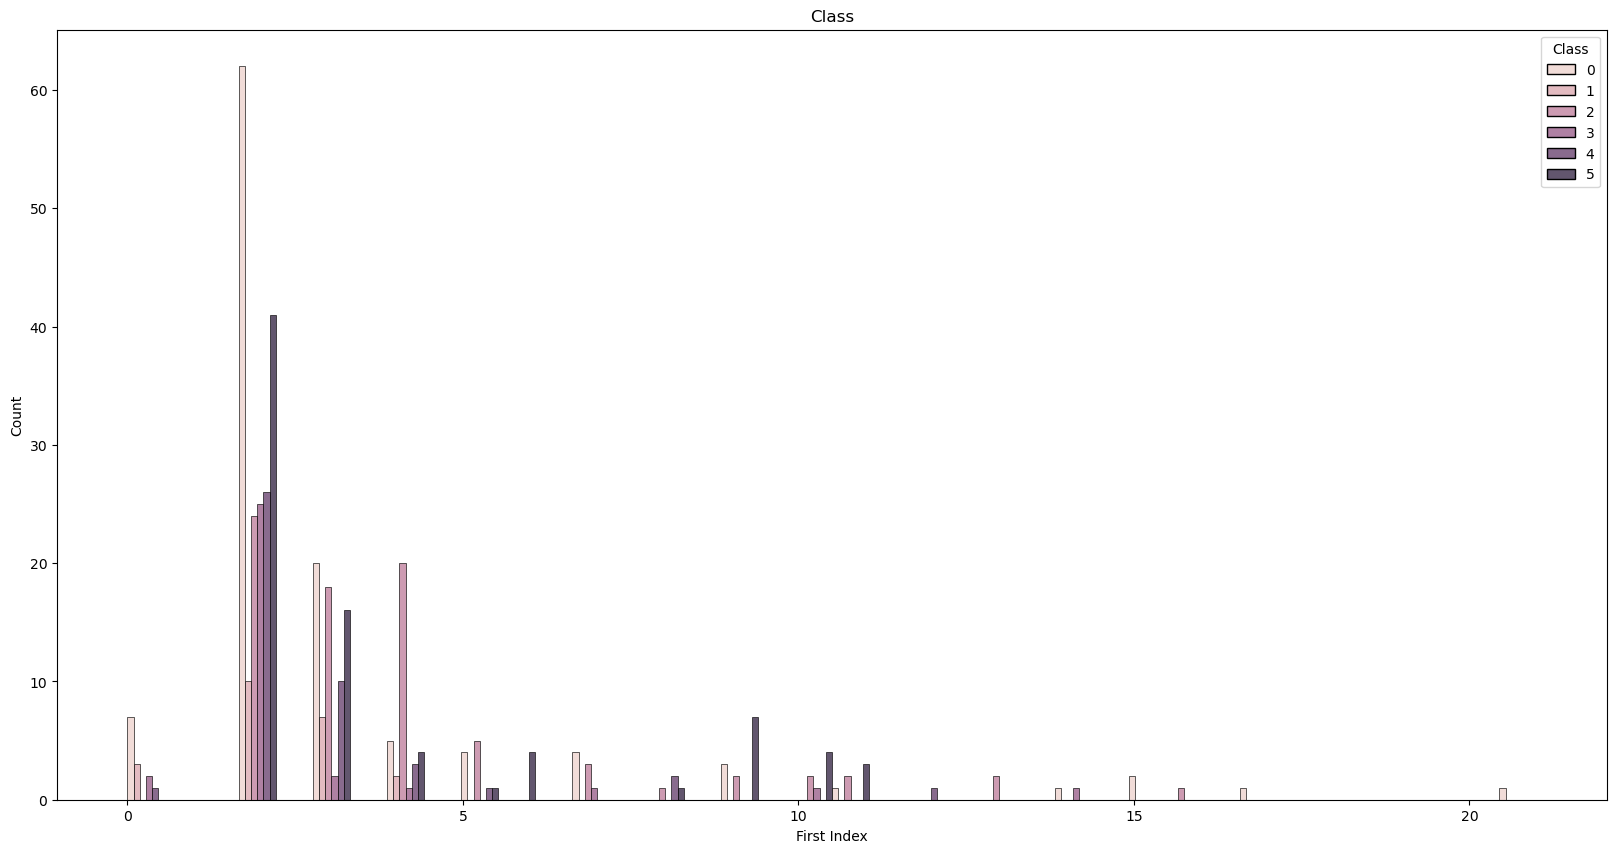

In [145]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['First Index'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'SECOND INDEX' FEATURE

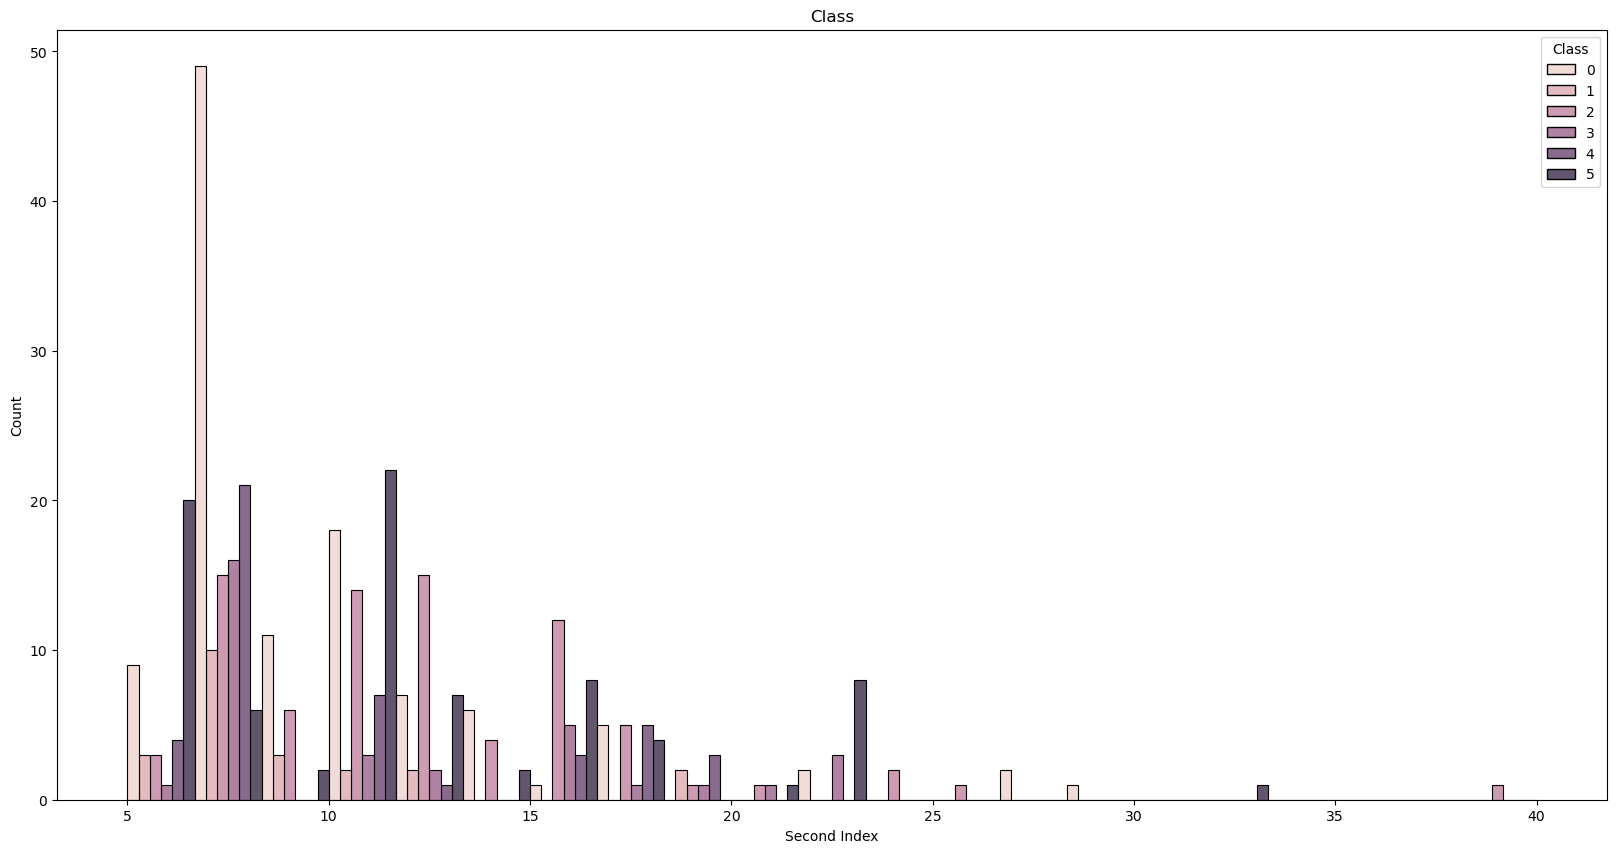

In [146]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Second Index'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### PLOTTING HISTOGRAM OF 'DIFFICULTY' FEATURE

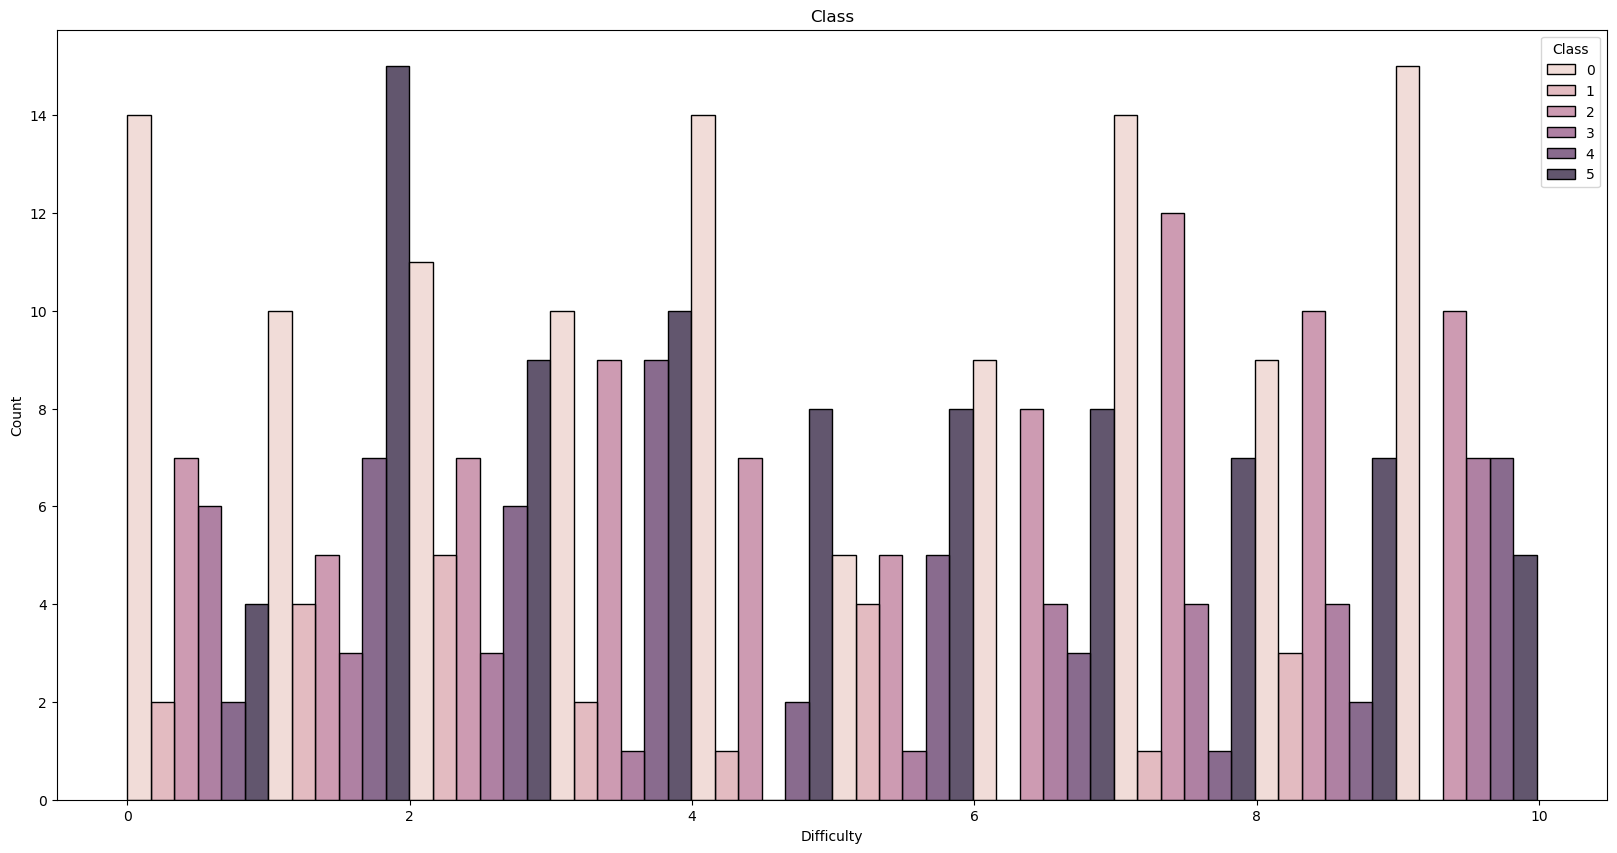

In [147]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_train,
            x=data_train['Difficulty'],
            hue='Class',
            multiple='dodge')
plt.title('Class')
plt.show()

#### APPLYING GET DUMMIES METHOD ON CATEGORICAL FEATURE 'SIZE', JOINING NEWLY CREATED DATASET TO DATA_TRAIN AND DATA_TEST, DELETING CATEGORICAL VARIABLE 'SIZE FROM DATASET'

In [148]:
train_get_dummies = pd.get_dummies(data_train['Size'], dtype= int)

test_get_dummies = pd.get_dummies(data_test['Size'], dtype= int)

data_train = pd.concat([data_train, train_get_dummies], axis= 1)

data_test = pd.concat([data_test, test_get_dummies], axis= 1)

dataset = [data_train, data_test]

for data in dataset:
    del data['Size']

data_train

,Number of Quantities,Number of Insignificant Quantities,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class,Big,Medium,Small
0,2.0,0.0,19.0,68.0,3.0,3,2,7,1.261660,133.0,0,0,1,0
1,2.0,0.0,20.0,66.0,3.0,3,2,7,1.442970,59.0,3,0,1,0
2,2.0,0.0,20.0,87.0,3.0,3,2,10,8.310969,79.0,0,0,1,0
3,2.0,0.0,21.0,73.0,3.0,3,2,8,9.435913,43.0,0,0,1,0
4,2.0,0.0,16.0,53.0,3.0,3,2,7,1.169768,18.0,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2.0,0.0,20.0,66.0,2.0,2,4,15,3.413486,100.0,2,0,0,1
367,3.0,1.0,30.0,109.0,4.0,4,2,7,0.136955,58.0,0,0,1,0
368,2.0,0.0,30.0,102.0,2.0,2,3,12,0.516789,24.0,2,0,0,1
369,2.0,0.0,31.0,109.0,3.0,3,6,10,8.585161,9.0,5,0,1,0


#### PLOTTING PEARSON CORRELATION GRAPH FOR DATA_TRAIN AND DATA_TEST VARIABLES TO CHECK FOR MULTICOLLINEARITY OF FEATURES

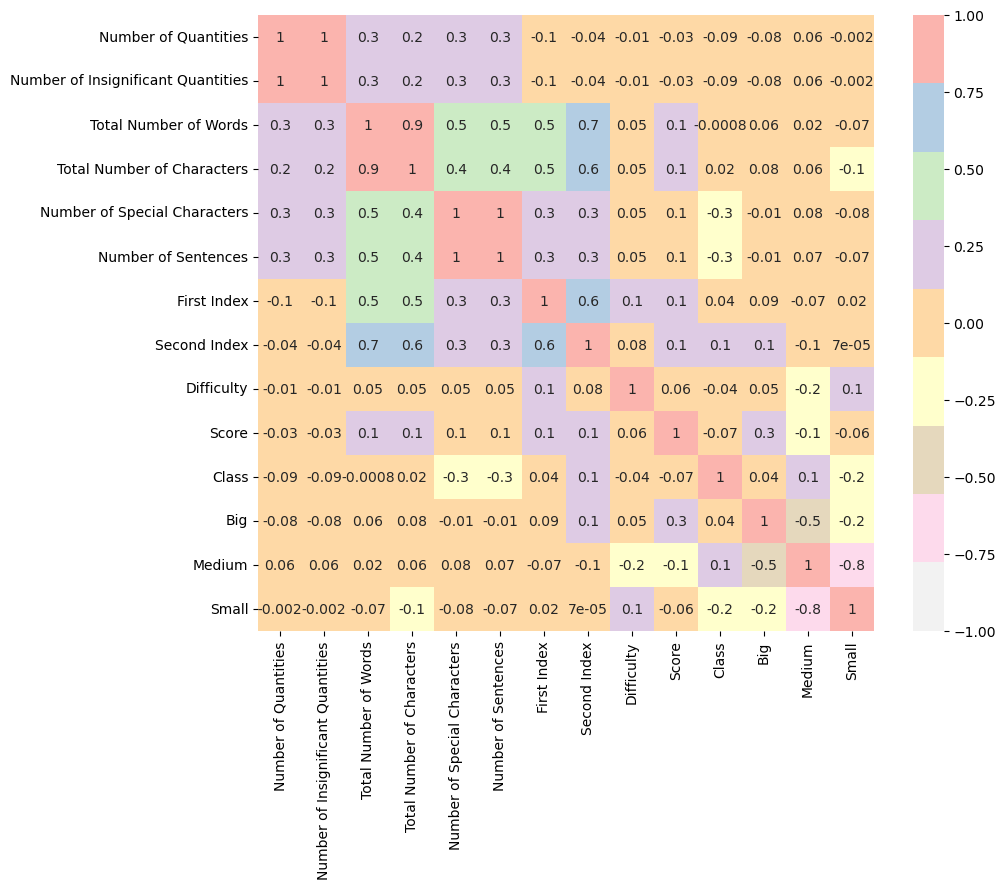

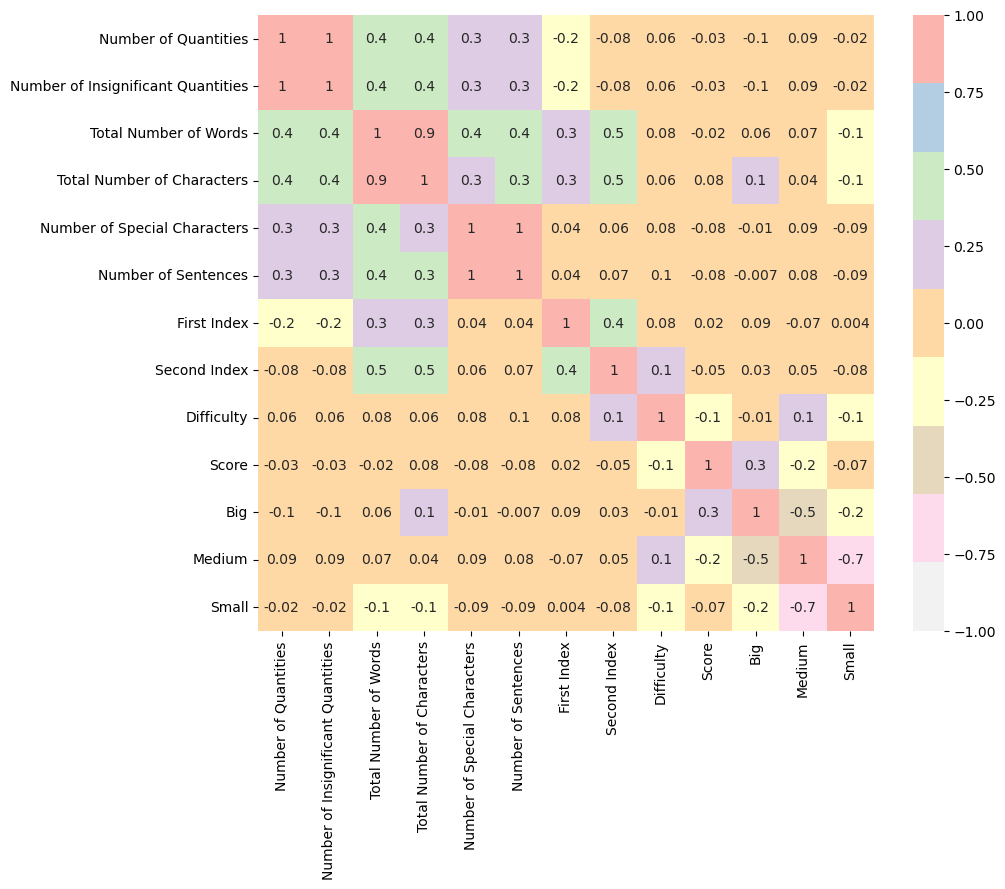

In [149]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.1g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### REMOVING FEATURES WHICH CAUSES MULTICOLLINEARITY

In [150]:
for data in dataset:
    del data['Number of Insignificant Quantities']
    del data['Total Number of Characters']
    del data['Number of Special Characters']

#### PLOTTING PEARSON CORRELATION PLOT AFTER REMOVAL OF ABOVE FEATURES

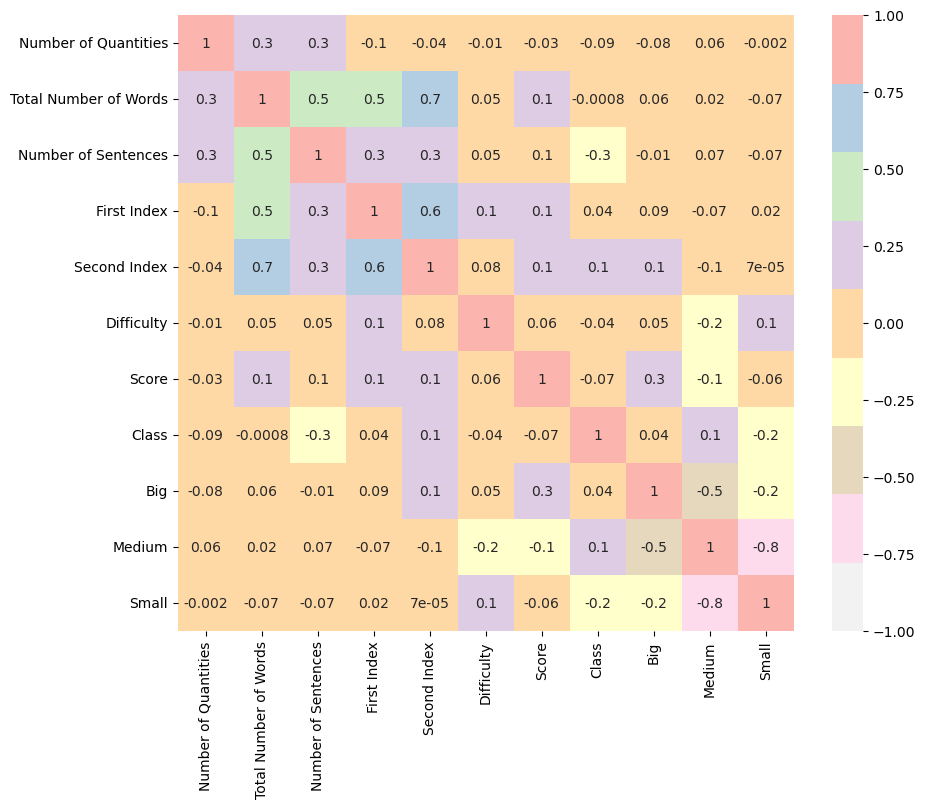

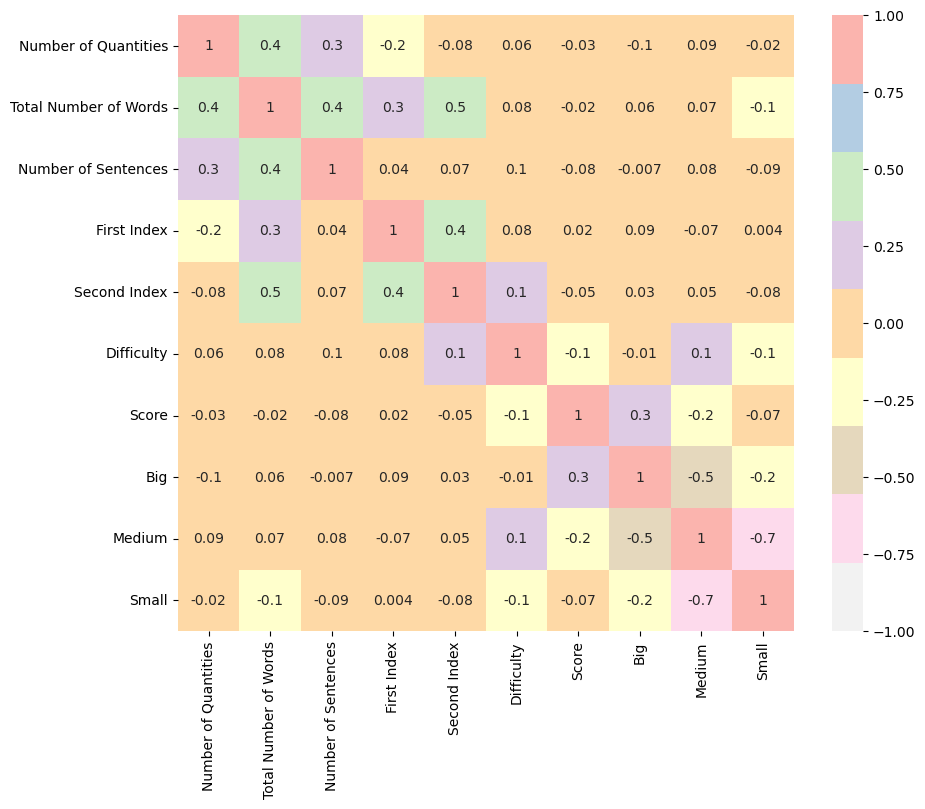

In [151]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.1g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### CREATING LIST WITH ALL MACHINE LEARNING ALGORITHMS FOR WHICH WE'LL APPLY FIT METHOD

In [152]:
models = [
    make_pipeline(RobustScaler(), LogisticRegression(multi_class='multinomial', 
                                                     solver='lbfgs',
                                                     max_iter=10000)),
    make_pipeline(RobustScaler(), LogisticRegression(multi_class='multinomial', 
                                                     solver='lbfgs',
                                                     penalty='l2',
                                                     max_iter=10000)),
    make_pipeline(RobustScaler(), svm.SVC()),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),  
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ]

#### DEFINING X, Y AND X_VAL

In [153]:
X = data_train.drop(['Class'], axis=1)

y = data_train['Class']

X_val = data_test

#### APPLYING TRAIN TEST SPLIT ON X AND Y

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#### DEFINING CROSS-VALIDATION PARAMS

In [155]:
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### FITTING ALL MENTIONED MACHINE LEARNING ALGORITHMS TO DATA, PRINTING ACCURACY RESULTS

In [156]:
model_name = []
train_score = []
test_score = []

for model in models:
    model.fit(X_train.values,y_train)
    score = cross_validate(model, X_train.values, y_train, cv=kfold, scoring='accuracy', return_train_score=True)
    model_name.append(type(model).__name__)
    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
    print(type(model).__name__)
    print(score['train_score'].mean())
    print(score['test_score'].mean())

Pipeline
0.6340794883508452
0.5731428571428572
Pipeline
0.6340794883508452
0.5731428571428572
Pipeline
0.3074717019440638
0.29044897959183674
KNeighborsClassifier
0.5997969646210852
0.4274285714285714
DecisionTreeClassifier
1.0
0.5247346938775509
RandomForestClassifier
1.0
0.6177142857142858
GradientBoostingClassifier
1.0
0.5852244897959185


#### PRINTING ACCURACY RESULTS

In [157]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={pd.DataFrame(model_name).columns[0]: 'Model name'}), 
                      pd.DataFrame(train_score).rename(columns={pd.DataFrame(train_score).columns[0]: 'Accuracy score train'}), 
                      pd.DataFrame(test_score).rename(columns={pd.DataFrame(test_score).columns[0]: 'Accuracy score test '})], 
                      axis=1)

overview

,Model name,Accuracy score train,Accuracy score test
0,Pipeline,0.634079,0.573143
1,Pipeline,0.634079,0.573143
2,Pipeline,0.307472,0.290449
3,KNeighborsClassifier,0.599797,0.427429
4,DecisionTreeClassifier,1.000000,0.524735
5,RandomForestClassifier,1.000000,0.617714
6,GradientBoostingClassifier,1.000000,0.585224


#### TRANSFORMING Y_TRAIN AND Y_TEST FOR FITTING NEURAL NETWORK

In [158]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

#### CREATING NEURAL NETWORK

In [159]:
classifier = Sequential()

classifier.add(Dense(10, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))
classifier.add(Dropout(0.2))

classifier.add(Dense(10, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(6, kernel_initializer = 'glorot_uniform', activation = 'softmax'))
classifier.add(Dropout(0.2))

classifier.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, validation_data = (X_test, y_test), validation_split=0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000
25/25 [==============================] - 3s 23ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 3/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1815 - val_loss: nan - val_accuracy: 0.3008
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2379 - val_loss: nan - val_accuracy: 0.3008
Epoch 5/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1815 - val_loss: nan - val_accuracy: 0.3008
Epoch 6/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.3008
Epoch 7/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 8/1000
25/25 [===========================

Epoch 61/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.3008
Epoch 62/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2460 - val_loss: nan - val_accuracy: 0.3008
Epoch 63/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1774 - val_loss: nan - val_accuracy: 0.3008
Epoch 64/1000
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.2298 - val_loss: nan - val_accuracy: 0.3008
Epoch 65/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 66/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 67/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.3008
Epoch 68/1000
25/25 [===================

25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 121/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2419 - val_loss: nan - val_accuracy: 0.3008
Epoch 122/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2460 - val_loss: nan - val_accuracy: 0.3008
Epoch 123/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 124/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1734 - val_loss: nan - val_accuracy: 0.3008
Epoch 125/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 126/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2258 - val_loss: nan - val_accuracy: 0.3008
Epoch 127/1000
25/25 [===========================

25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1815 - val_loss: nan - val_accuracy: 0.3008
Epoch 180/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2298 - val_loss: nan - val_accuracy: 0.3008
Epoch 181/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 182/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 183/1000
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 184/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 185/1000
25/25 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.2258 - val_loss: nan - val_accuracy: 0.3008
Epoch 186/1000
25/25 [========================

25/25 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 239/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2460 - val_loss: nan - val_accuracy: 0.3008
Epoch 240/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.3008
Epoch 241/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 242/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.3008
Epoch 243/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 244/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2177 - val_loss: nan - val_accuracy: 0.3008
Epoch 245/1000
25/25 [==========================

25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 298/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 299/1000
25/25 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 300/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 301/1000
25/25 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 302/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2016 - val_loss: nan - val_accuracy: 0.3008
Epoch 303/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 304/1000
25/25 [=========================

25/25 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 357/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 358/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 359/1000
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 360/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 361/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 362/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1694 - val_loss: nan - val_accuracy: 0.3008
Epoch 363/1000
25/25 [=========================

25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 416/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 417/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 418/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 419/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 420/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2540 - val_loss: nan - val_accuracy: 0.3008
Epoch 421/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2742 - val_loss: nan - val_accuracy: 0.3008
Epoch 422/1000
25/25 [===========================

25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 475/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2621 - val_loss: nan - val_accuracy: 0.3008
Epoch 476/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2379 - val_loss: nan - val_accuracy: 0.3008
Epoch 477/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 478/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 479/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1694 - val_loss: nan - val_accuracy: 0.3008
Epoch 480/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 481/1000
25/25 [===========================

25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 534/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2621 - val_loss: nan - val_accuracy: 0.3008
Epoch 535/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 536/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2460 - val_loss: nan - val_accuracy: 0.3008
Epoch 537/1000
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 538/1000
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.2137 - val_loss: nan - val_accuracy: 0.3008
Epoch 539/1000
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1815 - val_loss: nan - val_accuracy: 0.3008
Epoch 540/1000
25/25 [========================

25/25 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.3008
Epoch 593/1000
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 594/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2258 - val_loss: nan - val_accuracy: 0.3008
Epoch 595/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 596/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 597/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1653 - val_loss: nan - val_accuracy: 0.3008
Epoch 598/1000
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.2177 - val_loss: nan - val_accuracy: 0.3008
Epoch 599/1000
25/25 [=========================

25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.3008
Epoch 652/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2419 - val_loss: nan - val_accuracy: 0.3008
Epoch 653/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2258 - val_loss: nan - val_accuracy: 0.3008
Epoch 654/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 655/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 656/1000
25/25 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1815 - val_loss: nan - val_accuracy: 0.3008
Epoch 657/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 658/1000
25/25 [==========================

25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2702 - val_loss: nan - val_accuracy: 0.3008
Epoch 711/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 712/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 713/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 714/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 715/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2016 - val_loss: nan - val_accuracy: 0.3008
Epoch 716/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2016 - val_loss: nan - val_accuracy: 0.3008
Epoch 717/1000
25/25 [===========================

25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 770/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 771/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 772/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 773/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.3008
Epoch 774/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2379 - val_loss: nan - val_accuracy: 0.3008
Epoch 775/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 776/1000
25/25 [===========================

25/25 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.2298 - val_loss: nan - val_accuracy: 0.3008
Epoch 829/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2298 - val_loss: nan - val_accuracy: 0.3008
Epoch 830/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 831/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 832/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1935 - val_loss: nan - val_accuracy: 0.3008
Epoch 833/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1653 - val_loss: nan - val_accuracy: 0.3008
Epoch 834/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2460 - val_loss: nan - val_accuracy: 0.3008
Epoch 835/1000
25/25 [==========================

25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.1895 - val_loss: nan - val_accuracy: 0.3008
Epoch 888/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2056 - val_loss: nan - val_accuracy: 0.3008
Epoch 889/1000
25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2419 - val_loss: nan - val_accuracy: 0.3008
Epoch 890/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.2016 - val_loss: nan - val_accuracy: 0.3008
Epoch 891/1000
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.3008
Epoch 892/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 893/1000
25/25 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1855 - val_loss: nan - val_accuracy: 0.3008
Epoch 894/1000
25/25 [==========================

25/25 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.3008
Epoch 947/1000
25/25 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.2177 - val_loss: nan - val_accuracy: 0.3008
Epoch 948/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.3008
Epoch 949/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2097 - val_loss: nan - val_accuracy: 0.3008
Epoch 950/1000
25/25 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.2218 - val_loss: nan - val_accuracy: 0.3008
Epoch 951/1000
25/25 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.2258 - val_loss: nan - val_accuracy: 0.3008
Epoch 952/1000
25/25 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.1815 - val_loss: nan - val_accuracy: 0.3008
Epoch 953/1000
25/25 [=========================